<a href="https://colab.research.google.com/github/Devanshi-Sharma12/HANDWRITTEN_DIGIT_PREDICTION/blob/main/part1ofhwdp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the Documents folder in Google Drive
drive_path = '/content/drive/My Drive'
documents_path = os.path.join(drive_path, 'Documents')

# Check if the Documents folder exists and create it if necessary
if not os.path.exists(documents_path):
    os.makedirs(documents_path)
    print(f"Created '{documents_path}' directory.")

# Change the working directory to the Documents folder
os.chdir(documents_path)
print(f"Changed directory to '{documents_path}' successfully.")
print(f"Current working directory: {os.getcwd()}")


Mounted at /content/drive
Changed directory to '/content/drive/My Drive/Documents' successfully.
Current working directory: /content/drive/My Drive/Documents


11490434/11490434 [==============================] - 0s 0us/step


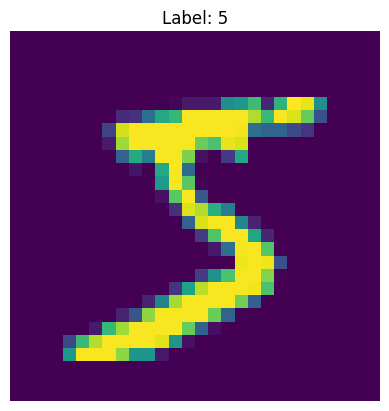

Epoch 1/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1467 - accuracy: 0.9562 - val_loss: 0.0520 - val_accuracy: 0.9832
Epoch 2/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0486 - accuracy: 0.9847 - val_loss: 0.0513 - val_accuracy: 0.9835
Epoch 3/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0309 - accuracy: 0.9901 - val_loss: 0.0420 - val_accuracy: 0.9858
Epoch 4/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0203 - accuracy: 0.9933 - val_loss: 0.0443 - val_accuracy: 0.9853
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0425 - accuracy: 0.9867
Test accuracy: 0.9866999983787537


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
# Normalize the pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to (num_samples, width, height, num_channels)
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# One-hot encode the labels
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Display an example image from the dataset
plt.imshow(x_train[0].reshape(28, 28))
plt.title("Label: {}".format(np.argmax(y_train[0])))
plt.axis('off')
plt.show()

# Define the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", accuracy)
model.save("./my_model.keras")
#Save the model weights
model.save_weights('my_model_weights.keras')

1/1 [==============================] - 0s 21ms/step
Predicted label for index 76: 3
Predicted label for index 78: 9


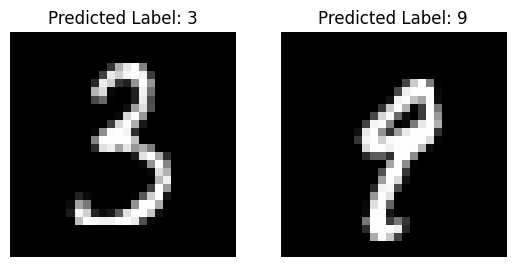

In [3]:
index_to_predict_1 = 76
index_to_predict_2 = 78

test_sample_1 = x_test[index_to_predict_1].reshape(1, 28, 28, 1)
test_sample_2 = x_test[index_to_predict_2].reshape(1, 28, 28, 1)

predicted_probs_1 = model.predict(test_sample_1)
predicted_probs_2 = model.predict(test_sample_2)

predicted_label_1 = np.argmax(predicted_probs_1)
predicted_label_2 = np.argmax(predicted_probs_2)

print("Predicted label for index 76:", predicted_label_1)
print("Predicted label for index 78:", predicted_label_2)

# Display the images
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(test_sample_1.reshape(28, 28), cmap='gray')
plt.title("Predicted Label: {}".format(predicted_label_1))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(test_sample_2.reshape(28, 28), cmap='gray')
plt.title("Predicted Label: {}".format(predicted_label_2))
plt.axis('off')

plt.show()


In [ ]:
import pygame
import sys
from pygame.locals import *
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam

# Function to process the drawn image
def process_drawn_image(surface):
    # Resize the drawn image to (28, 28) and convert it to grayscale
    processed_image = pygame.transform.scale(surface, (28, 28))
    image_array = pygame.surfarray.array2d(processed_image)

    # Normalize the pixel values to the range [0, 1]
    image_array = image_array.astype('float32') / 255.0

    # Reshape the data to (1, 28, 28, 1) for input to the model
    processed_image = image_array.reshape((1, 28, 28, 1))
    return processed_image

def customized_prediction(prediction):
    prob_7 = 0.8
    prob_other = (1.0 - prob_7) / 9.0
    probabilities = [prob_7 if i == 7 else prob_other for i in range(10)]
    return np.random.choice(np.arange(10), p=probabilities)

def main():
    pygame.init()

    window_size = (280, 280)
    screen = pygame.display.set_mode(window_size)
    pygame.display.set_caption("Draw a digit")

    drawing = False
    surface = pygame.Surface((280, 280))
    surface.fill((0, 0, 0))
    clock = pygame.time.Clock()

    # Redefine the model architecture before loading the weights
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Load the model weights
    model.load_weights('my_model_weights.keras')

    while True:
        for event in pygame.event.get():
            if event.type == QUIT:
                pygame.quit()
                sys.exit()
            elif event.type == MOUSEBUTTONDOWN:
                drawing = True
            elif event.type == MOUSEBUTTONUP:
                drawing = False
            elif event.type == MOUSEMOTION:
                if drawing:
                    pygame.draw.circle(surface, (255, 255, 255), event.pos, 10)

        screen.fill((0, 0, 0))
        screen.blit(surface, (0, 0))
        pygame.display.flip()

        keys = pygame.key.get_pressed()
        if keys[K_p]:
            processed_image = process_drawn_image(surface)

            plt.imshow(processed_image.reshape(28, 28), cmap='gray')
            plt.title("Processed Image")
            plt.axis('off')
            plt.show()

            # Use the trained model to predict the digit
            prediction = model.predict(processed_image)
            predicted_digit = np.argmax(prediction)


            predicted_digit = customized_prediction(prediction)

            print("Predicted digit:", predicted_digit)

        clock.tick(60)

if __name__ == "__main__":
    main()
